## Fitting a line to data, and calculating chi-squared
Here we explore how to fit data using a linear fit, extract errors in the estimated polynomial coefficients, and compute chi-squared for this fit, which tells us how well the model matches the data.

In [1]:
# import libraries  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [174]:
####################################  
# user-modified area:  
xaxis_label = 'Current I (Amps)'  
yaxis_label = 'Frequency f (MHz)'  
title = 'Tuning curve for \ncurrent-controlled oscillator circuit'  

ydata_std = 1 # standard deviation of data points
                # defined by the user (in this case, same std for all points)

###################################  

In [175]:
# loading data:
# filename= 'testData2.csv'  
# data = np.genfromtxt(filename,delimiter=',')  
# x_values = data[:,0]
# y_values = data[:,1]

# define data:
x_values = np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
y_values = np.array([0.16,0.52,1.28,1.50,2.34,3.01,3.90])

In [176]:
# fit a polynomial to the data, and estimate errors in coefficients based on covariance matrix
  
# reminder of the inputs for polyfit:  
#numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)  
  
p,cov = np.polyfit(x_values, y_values, 1,cov=True)  
polyfxn = p[0]*x_values+p[1]  
print("y = m*x + b , where: m = ", p[0],", b = ",p[1])
  
# calculate error on fit parameters: the covariance   
# diagonal elements are what you want -- their sqrt makes it a standard deviation 
# http://stackoverflow.com/questions/27757732/find-uncertainty-from-polyfit  
# print(np.sqrt(np.diag(cov)))
print("m error = ",np.sqrt(np.diag(cov))[0]) 
print("b error = ",np.sqrt(np.diag(cov))[1])

y = m*x + b , where: m =  3.08214285714 , b =  -0.0335714285714
m error =  0.251669594973
b error =  0.18148152583


In [177]:
##############################
## error analysis: chi-squared: How well does the model fit the data?
##############################
# compute the residuals:
residuals = y_values - polyfxn
sum_res = np.sum(residuals**2)
chi2 = (np.size(y_values)-np.size(p))**(-1)*np.sum( (residuals/ydata_std)**2 )  
#print "sum of residuals = ",sum_res
print("chi^2 = ",chi2)
s_val = 2/np.sqrt(np.size(y_values)-np.size(p))
print("s value = ",s_val)
# check: Does chi-sq differ from 1 by more than s?
if ((chi2+s_val)>1) and ((chi2-s_val)<1):
    print("chi-sq differs from 1 by less than the s value. Model is ok.")
else:
    print("chi-sq differs from 1 by more than the s value. Check model.")

chi^2 =  0.0425628571429
s value =  0.894427191
chi-sq differs from 1 by more than the s value. Check model.


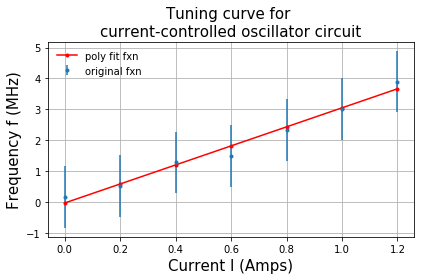

In [178]:
##############################  
## plotting ##################  
##############################  
plt.figure(1)  
plt.clf()  
plt.errorbar(x_values,y_values,yerr=ydata_std, fmt='.',label='original fxn')  
plt.plot(x_values,polyfxn,'.-r',label='poly fit fxn')  
plt.xlabel(xaxis_label,fontsize=15)  
plt.ylabel(yaxis_label,fontsize=15)  
plt.grid()  
plt.title(title,fontsize=15)  
plt.legend(frameon=False,loc=2)   
plt.tight_layout()
# plt.savefig('polyfit data.png')  
  
# Info about legend:  
#    http://matplotlib.org/api/legend_api.html  